In [207]:
import pandas as pd
import math
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [208]:
def pearson(rating1, rating2):
    sum_xy = 0
    sum_x = 0
    sum_y = 0
    sum_x2 = 0
    sum_y2 =0
    n = 0
    for value in range(len(rating1)):
        #if value in rating2:
        n+=1
        #x = rating1[key]
        x = rating1[value]
        #y = rating2[key]
        y = rating2[value]
        sum_xy += x * y
        sum_x += x
        sum_y += y
        sum_x2 += x**2
        sum_y2 += y**2
    if n == 0:
        return 0    
    denominator = math.sqrt(sum_x2 - (sum_x**2)/n) * math.sqrt(sum_y2 - (sum_y**2)/n)
    if denominator == 0:
        return 0
    else:
        return (sum_xy - (sum_x * sum_y)/n) / denominator

In [209]:
#recebe uma Serie e calcula o desvio padrao absoluto
def absolute_standard_deviation(serie):
    median = serie.median()
    standard_deviation = 0.0
    summ = 0.0
    for avaliation in serie:
        summ += abs(avaliation-median)
    standard_deviation = summ / len(serie)
    return standard_deviation

#recebe um dicionario e calcula a pontuacao padrao para todas as avaliacoes de todas as chaves do dicionario
def modified_standard_score(avaliations):
    themes = avaliations.keys()
    theme_avaliations = []
    for theme in themes:
        theme_avaliations = avaliations[theme]
        median = pd.Series(theme_avaliations).median()
        standard_deviation = absolute_standard_deviation(pd.Series(theme_avaliations))
        modified_standard_score = 0.0
        modified_avaliations = []
        for avaliation in theme_avaliations:
            modified_standard_score += (avaliation-median)/standard_deviation
            modified_avaliations.append(modified_standard_score)
            modified_standard_score = 0.0
        avaliations[theme] = modified_avaliations
    return avaliations

In [210]:
# contagem de palavras
candidates = {
    "aldo":[10,9,4,28,9,13,3,4],
    "dias":[18,43,2,87,11,14,16,12],
    "ciro":[6,14,3,52,8,12,3,11],
    "buarque":[0,1,0,0,0,0,0,3],
    "eymael":[0,4,0,4,0,1,2,1],
    "flavio":[4,24,2,22,2,1,6,8],
    "alckmin":[2,14,0,5,3,2,3,2],
    "boulos":[2,8,3,13,2,1,2,6],
    "meirelles":[1,10,2,4,2,2,0,1],
    "bolsonaro":[4,6,2,7,4,3,3,4],
    "amoedo":[20,59,6,52,13,1,21,25],
    "marina":[7,22,1,17,9,10,13,2],
    "manuella":[7,11,5,29,9,3,9,13],
    "levy":[3,7,1,18,1,4,6,3],
    "rabello":[0,15,1,12,0,2,1,7],
    "maia":[1,3,0,13,2,0,3,3],
    "vera":[1,5,0,6,2,2,2,1]
}

In [211]:
modified_candidates = modified_standard_score(candidates)
print(modified_candidates)

{'aldo': [0.20000000000000001, 0.0, -1.0, 3.7999999999999998, 0.0, 0.80000000000000004, -1.2, -1.0], 'dias': [0.192, 1.792, -0.83199999999999996, 4.6079999999999997, -0.25600000000000001, -0.064000000000000001, 0.064000000000000001, -0.192], 'ciro': [-0.40579710144927539, 0.52173913043478259, -0.75362318840579712, 4.9275362318840576, -0.17391304347826086, 0.28985507246376813, -0.75362318840579712, 0.17391304347826086], 'buarque': [0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0], 'eymael': [-0.80000000000000004, 2.3999999999999999, -0.80000000000000004, 2.3999999999999999, -0.80000000000000004, 0.0, 0.80000000000000004, 0.0], 'flavio': [-0.15686274509803921, 2.9803921568627452, -0.47058823529411764, 2.6666666666666665, -0.47058823529411764, -0.62745098039215685, 0.15686274509803921, 0.47058823529411764], 'alckmin': [-0.21052631578947367, 4.8421052631578947, -1.0526315789473684, 1.0526315789473684, 0.21052631578947367, -0.21052631578947367, 0.21052631578947367, -0.21052631578947367], 'boulos': [

In [212]:
users = {
    "user1": [3,2,5,1,2,3,4,2],
    "user2": [5,1,2,3,4,1,4,5],
    "user3": [2,4,5,1,3,2,4,1],
    "user4": [4,2,2,3,2,5,4,2]
}

In [213]:
modified_users = modified_standard_score(users)
print(modified_users)

{'user1': [0.5, -0.5, 2.5, -1.5, -0.5, 0.5, 1.5, -0.5], 'user2': [1.0909090909090908, -1.8181818181818181, -1.0909090909090908, -0.36363636363636365, 0.36363636363636365, -1.8181818181818181, 0.36363636363636365, 1.0909090909090908], 'user3': [-0.40000000000000002, 1.2, 2.0, -1.2, 0.40000000000000002, -0.40000000000000002, 1.2, -1.2], 'user4': [1.5, -0.5, -0.5, 0.5, -0.5, 2.5, 1.5, -0.5]}


In [214]:
print(users['user1'])
print(candidates['levy'])
print(pearson(users['user1'], candidates['levy']))

[0.5, -0.5, 2.5, -1.5, -0.5, 0.5, 1.5, -0.5]
[-0.14814814814814814, 1.037037037037037, -0.7407407407407407, 4.2962962962962967, -0.7407407407407407, 0.14814814814814814, 0.7407407407407407, -0.14814814814814814]
-0.569625628411


In [215]:
similaridades = []
user1 = users['user1']
print(user1)
for key in modified_candidates:
    candidato = modified_candidates[key]
    similaridades.append(pearson(user1, candidato))
print(similaridades)

[0.5, -0.5, 2.5, -1.5, -0.5, 0.5, 1.5, -0.5]
[-0.64903260758267634, -0.68478751527569959, -0.70067462200655062, -0.31277162108561213, -0.52750437871662947, -0.6161793379487186, -0.47041980902988206, -0.66659487908967652, -0.40677712066840793, -0.8654017806000992, -0.63870341748234316, -0.49560621817168909, -0.70083144667245034, -0.56962562841050957, -0.63306223121451854, -0.65840711847210409, -0.7148468390323296]


In [216]:
y = similaridades

In [217]:
print(y)

[-0.64903260758267634, -0.68478751527569959, -0.70067462200655062, -0.31277162108561213, -0.52750437871662947, -0.6161793379487186, -0.47041980902988206, -0.66659487908967652, -0.40677712066840793, -0.8654017806000992, -0.63870341748234316, -0.49560621817168909, -0.70083144667245034, -0.56962562841050957, -0.63306223121451854, -0.65840711847210409, -0.7148468390323296]


In [218]:
x = range(len(y))
print(x)

range(0, 17)


<Container object of 17 artists>

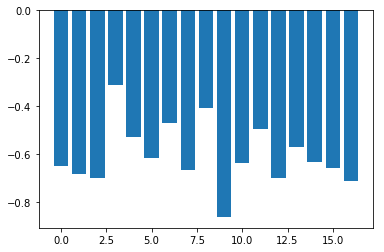

In [219]:
plt.bar(x, y)

In [220]:
a = modified_users['user1']
b = modified_candidates['levy']
print(a)
print(b)

[0.5, -0.5, 2.5, -1.5, -0.5, 0.5, 1.5, -0.5]
[-0.14814814814814814, 1.037037037037037, -0.7407407407407407, 4.2962962962962967, -0.7407407407407407, 0.14814814814814814, 0.7407407407407407, -0.14814814814814814]


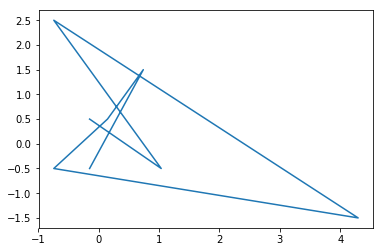

In [221]:
plt.plot(b, a)

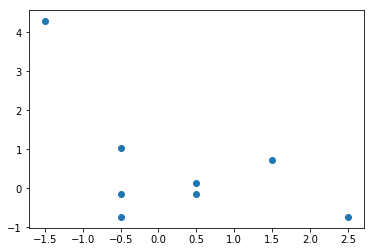

In [222]:
plt.scatter(a, b)

In [223]:
def manhattan(rating1, rating2):
    distance = 0
    for key in range(len(rating1)):
        #if key in rating2:
        distance += abs(rating1[key] - rating2[key])
    return distance

In [224]:
manhattan(users['user1'], candidates['levy'])

12.925925925925924

In [225]:
similaridades = []
user1 = users['user1']
print(user1)
for key in modified_candidates:
    candidato = modified_candidates[key]
    similaridades.append(manhattan(user1, candidato))
print(similaridades)

[0.5, -0.5, 2.5, -1.5, -0.5, 0.5, 1.5, -0.5]
[13.600000000000001, 14.591999999999999, 15.072463768115943, 16.0, 13.4, 14.745098039215685, 15.157894736842104, 15.304347826086955, 14.999999999999998, 16.0, 14.931623931623932, 13.325581395348838, 16.0, 12.925925925925924, 15.058823529411764, 15.157894736842104, 15.0]


In [226]:
def cossenoSimilarity(rating1, rating2):
    numerador = 0 #x * y
    x_comp = 0 # ||x||
    y_comp = 0 # ||y||
    for key in range(len(rating1)):
        #if key in rating2:
        numerador = numerador + (rating1[key]*rating2[key])
        x_comp = x_comp + pow(rating1[key], 2)
        y_comp = y_comp + pow(rating2[key], 2)
    denominador = math.sqrt(x_comp) * math.sqrt(y_comp)
    if denominador == 0:
        return 0
    else:
        return numerador / denominador

In [227]:
similaridades = []
user1 = users['user1']
print(user1)
for key in modified_candidates:
    candidato = modified_candidates[key]
    similaridades.append(cossenoSimilarity(user1, candidato))
print(similaridades)

[0.5, -0.5, 2.5, -1.5, -0.5, 0.5, 1.5, -0.5]
[-0.60306330084625959, -0.54561674723334286, -0.60718757348677654, -0.18257418583505536, -0.43082021842766449, -0.47632813186776307, -0.37030932398980992, -0.4738064176090499, -0.33557802760701222, -0.8278327231656526, -0.56907376511126961, -0.46404272233076566, -0.62187594572933169, -0.45464014165293831, -0.43036428131775345, -0.60435478735152659, -0.64809480920651574]


In [ ]:
themes = [[10, 18, 6, 0, 0, 4, 2, 2, 1, 4, 20, 7, 7, 3, 0, 1, 1], 
          [9, 43, 14, 1, 4, 24, 14, 8, 10, 6, 59, 22, 11, 7, 15, 3, 5], 
          [4, 2, 3, 0, 0, 2, 0, 3, 2, 2, 6, 1, 5, 1, 1, 0, 0], 
          [28, 87, 52, 0, 4, 22, 5, 13, 4, 7, 52, 17, 29, 18, 12, 13, 6], 
          [9, 11, 8, 0, 0, 2, 3, 2, 2, 4, 13, 9, 9, 1, 0, 2, 2], 
          [13, 14, 12, 0, 1, 1, 2, 1, 2, 3, 1, 10, 3, 4, 2, 0, 2], 
          [3, 16, 3, 0, 2, 6, 3, 2, 0, 3, 21, 13, 9, 6, 1, 3, 2], 
          [4, 12, 11, 3, 1, 8, 2, 6, 1, 4, 25, 2, 13, 3, 7, 3, 1]]

#recebe uma Serie e calcula o desvio padrao absoluto
def absolute_standard_deviation(serie):
    median = serie.median()
    standard_deviation = 0.0
    summ = 0.0
    for avaliation in serie:
        summ += abs(avaliation-median)
    standard_deviation = summ / len(serie)
    return standard_deviation

#recebe um dicionario e calcula a pontuacao padrao para todas as avaliacoes de todas as chaves do dicionario
def modified_standard_score(avaliations):
    #themes = avaliations.keys()
    theme_avaliations = []
    for theme in themes:
        theme_avaliations = avaliations[theme]
        median = pd.Series(theme_avaliations).median()
        standard_deviation = absolute_standard_deviation(pd.Series(theme_avaliations))
        modified_standard_score = 0.0
        modified_avaliations = []
        for avaliation in theme_avaliations:
            modified_standard_score += (avaliation-median)/standard_deviation
            modified_avaliations.append(modified_standard_score)
            modified_standard_score = 0.0
        avaliations[theme] = modified_avaliations
    return avaliations